<a href="https://colab.research.google.com/github/jimwellh/NYCU-Introduction-to-Data-science/blob/main/0811033_%E9%BB%83%E5%8B%81%E7%91%8B_hw02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Data Science** Homework 2  

0811033_黃勁瑋_hw02\
2023/09/30


*  Use R, Python, and suitable computer packages to analyze the data set that you select.
*  Explain the results you obtain.
*  Discuss possible problems you plan to investigate for future studies.



In this homework, a dataset from Kaggle is laoded and briefly analyzed by the provided code. The dataset which was chosen to demonstrate for this homework is the "Electric Power Consumption" dataset from Kaggle. According to Kaggle and the corresponding paper of this dataset "https://sci-hub.se/10.1109/IRSEC.2018.8703007", the dataset was updated 1 year ago. It records the power consumption of Tetouan, a city located in the north of Morocco. The data provider collected the data every 10 minitues from 2017/01/01 to 2017/12/31. For each data point, the time and it's corresponding temperaturem, humidity, wind speed, general diffuse flows, diffuse flows, and power generated by 3 source stations, namely: Quads,
Smir and Boussafou are recorded. Notice that the total power consumption of the city should be propotional to the sum of the power generated by the 3 power plantes pluse some extra power sources.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import data**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Introduction to Data science/Data sets/powerconsumption.csv')
#check is the data is read successfully
print(data.head(10))

        Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  1/1/2017 0:00        6.559      73.8      0.083                0.051   
1  1/1/2017 0:10        6.414      74.5      0.083                0.070   
2  1/1/2017 0:20        6.313      74.5      0.080                0.062   
3  1/1/2017 0:30        6.121      75.0      0.083                0.091   
4  1/1/2017 0:40        5.921      75.7      0.081                0.048   
5  1/1/2017 0:50        5.853      76.9      0.081                0.059   
6  1/1/2017 1:00        5.641      77.7      0.080                0.048   
7  1/1/2017 1:10        5.496      78.2      0.085                0.055   
8  1/1/2017 1:20        5.678      78.1      0.081                0.066   
9  1/1/2017 1:30        5.491      77.3      0.082                0.062   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354 

As we can see, the data is load successfully.

**Import libaries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**View the infomation of the data**

In [ ]:
data.info

<bound method DataFrame.info of                Datetime  Temperature  Humidity  WindSpeed  \
0         1/1/2017 0:00        6.559      73.8      0.083   
1         1/1/2017 0:10        6.414      74.5      0.083   
2         1/1/2017 0:20        6.313      74.5      0.080   
3         1/1/2017 0:30        6.121      75.0      0.083   
4         1/1/2017 0:40        5.921      75.7      0.081   
...                 ...          ...       ...        ...   
52411  12/30/2017 23:10        7.010      72.4      0.080   
52412  12/30/2017 23:20        6.947      72.6      0.082   
52413  12/30/2017 23:30        6.900      72.8      0.086   
52414  12/30/2017 23:40        6.758      73.0      0.080   
52415  12/30/2017 23:50        6.580      74.1      0.081   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption_Zone1  \
0                    0.051         0.119             34055.69620   
1                    0.070         0.085             29814.68354   
2                    0.062     

From the *info* attribute of our data set, we can see that the data set we load is a 52416 rows x 9 columns tensor. Each row represents a data point, and each columns describes a feature of the data. This infomation fulfills the introduction of this data set on Kaggle.   

In [ ]:
data.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

From the *columns* attribute of our data set, we can see that the data set we load do contain the infomation as Kaggle suggest.

In [ ]:
data.isnull().any()

Datetime                  False
Temperature               False
Humidity                  False
WindSpeed                 False
GeneralDiffuseFlows       False
DiffuseFlows              False
PowerConsumption_Zone1    False
PowerConsumption_Zone2    False
PowerConsumption_Zone3    False
dtype: bool

Using the *isnull()* function, we can check that there is no missing data in our data set.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


Another way to check the above infomation is using the *info()* function.

**Calculate the statical parameters of the data**

In [ ]:
data.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


Using the *describe()* function on our data set, we can calculate the descriptive statistics including those that summarize the central tendency, dispersion and shape of a dataset's distribution. Since we already checked that there is no missing value in our data, we could comfirm that the result returned by the *describe()* function reflects the actual statistical parameters of our entire sample.

<Axes: >

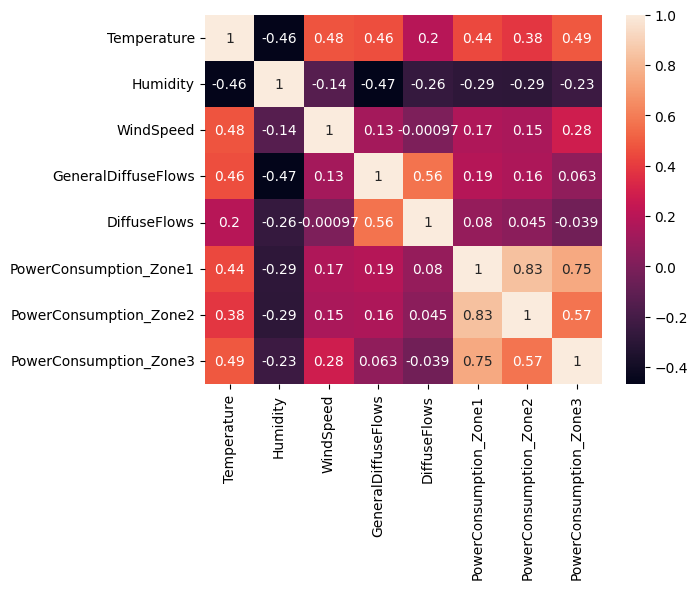

In [ ]:
import seaborn as sns
sns.heatmap(data.iloc[:, 1:].corr(), annot=True)

The above code claculates the correlation between each variable and plot the result as a heat map. From the figure we can see that the power comsumption of zone 1, 2 and 3 are most likely to be effectted by temperature, however, the temperature could be strongly relate to hunidity, windspeed and general diffuse flows, where general diffuse flows could be a function of diffuse flows.

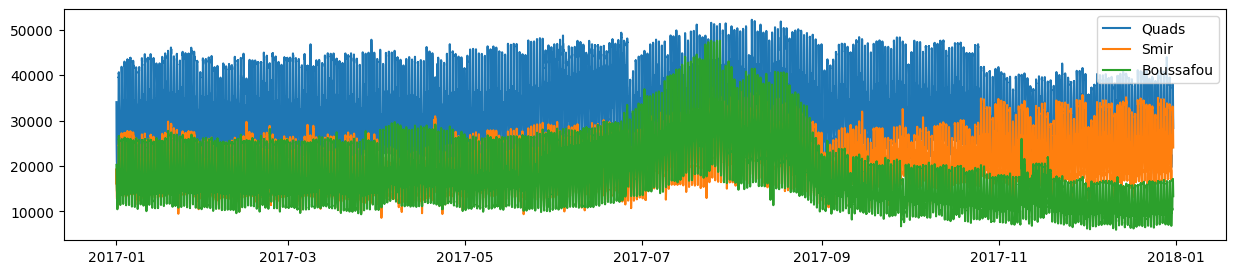

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize=(15,3))
plt.plot(pd.to_datetime(data['Datetime']),data['PowerConsumption_Zone1'],label='Quads')
plt.plot(pd.to_datetime(data['Datetime']),data['PowerConsumption_Zone2'],label='Smir')
plt.plot(pd.to_datetime(data['Datetime']),data['PowerConsumption_Zone3'],label='Boussafou')
plt.legend()


From this figure we can see that power plante Quads generate the most power amoung all 3 power plantes. Moreover, Quads generate power more uniformly during the entire time. For all three power plantes, they generate the nost power during summer, which indicates that the city consume more power during summer. According to the data provider, Morocco is hot and dry during the summer months; Our power consumption data may show that the city consume more power because of the weather.  

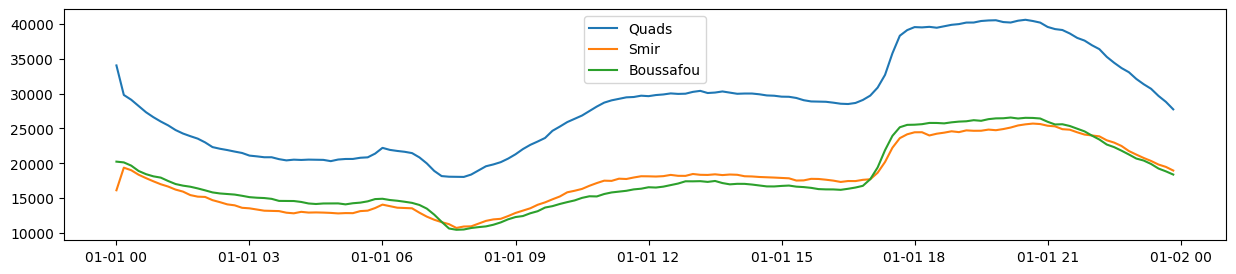

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(pd.to_datetime(data['Datetime'].iloc[0:144]),data['PowerConsumption_Zone1'].iloc[0:144],label='Quads')
plt.plot(pd.to_datetime(data['Datetime'].iloc[0:144]),data['PowerConsumption_Zone2'].iloc[0:144],label='Smir')
plt.plot(pd.to_datetime(data['Datetime'].iloc[0:144]),data['PowerConsumption_Zone3'].iloc[0:144],label='Boussafou')
plt.legend()


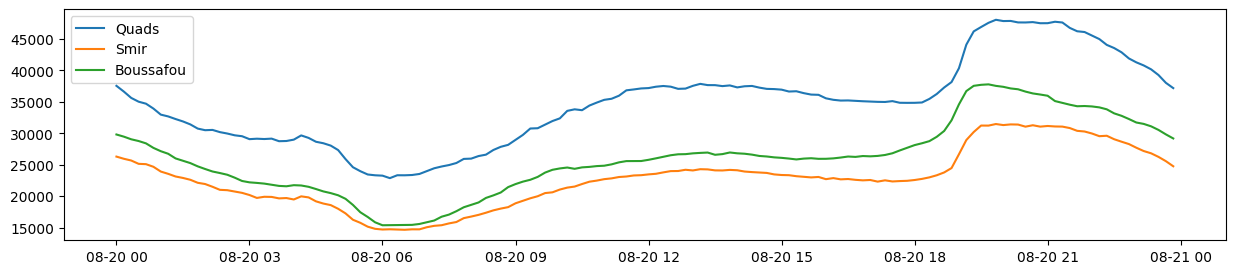

In [ ]:
plt.figure(figsize=(15,3))
plt.plot(pd.to_datetime(data['Datetime'].iloc[33264:33408]),data['PowerConsumption_Zone1'].iloc[33264:33408],label='Quads')
plt.plot(pd.to_datetime(data['Datetime'].iloc[33264:33408]),data['PowerConsumption_Zone2'].iloc[33264:33408],label='Smir')
plt.plot(pd.to_datetime(data['Datetime'].iloc[33264:33408]),data['PowerConsumption_Zone3'].iloc[33264:33408],label='Boussafou')
plt.legend()


Randomly picking a witnter and a summer day of the same year and plot their power comsumption, we could discover that daily peak power demand occurs at night time, and the power demand is time dependent. The graph also looks similiar to the famous "duck curve."
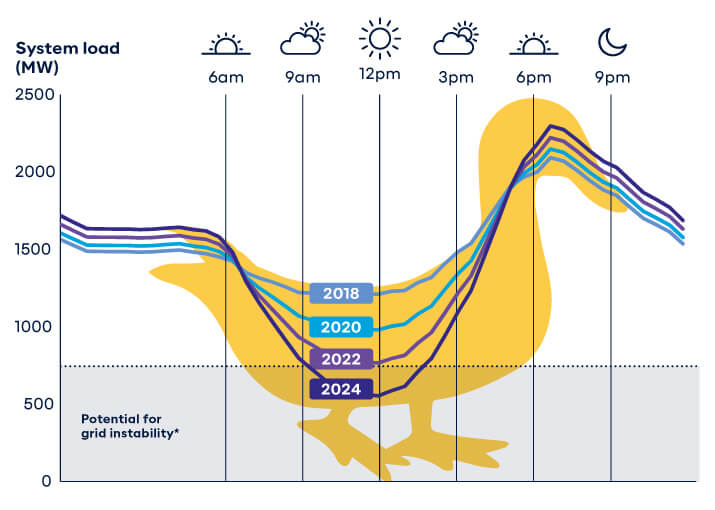


**Conclusion**

In this homework we discover how each parameters affect the power generation. We find that all variables given in this dataset are linked to each other with a correlation around 0.4. We also conclude that the data is time dependent. The power consumption varies with season in a year and varies with day and night time during a day. The daily peak power demand occurs at night time.  

A potential problem that could be solved using this dataset is to predic how much power shoukd the powerplante generate at a certain time. This is critical since power plantes usually need prepare time before starting to generate electricity. Moreover, a side comparison for differenr ML model could be done using this dataset. After a model was trained, we could test the generalization of the model using another power consumption data from another place. On top of that, we could treate the model we developed for this dataset as a pretrained model the see if this model can be quickly reuse and re-engineer to predict another power consumption dataset.   